# **Statistical Modeling of Solar Flares**


# **0.0 Imports**

**0.1 Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import expon
from scipy.stats import lognorm

In [3]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

**0.2 Helper Functions**

In [4]:
from google.colab import files
import io

from sklearn.metrics import mean_squared_error

# **1.0 Data Description**

**1.1 Loading Data**

In [5]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['SolarFlare.csv']))

Saving SolarFlare.csv to SolarFlare.csv


In [6]:
df.head()

,Unnamed: 0,class,NOAA_ar_num,event_date,start_time,end_time,peak_time
0,0,B1.8,12624,1/4/2017,4/1/17 2:34,4/1/17 2:50,1/4/17 2:39
1,1,B1.3,12626,1/16/2017,1/16/17 1:41,1/16/17 1:48,1/16/17 1:44
2,2,B1.4,12625,1/16/2017,1/16/17 18:12,1/16/17 18:35,1/16/17 18:23
3,3,B1.0,12628,1/20/2017,1/20/17 6:33,1/20/17 6:37,1/20/17 6:36
4,4,B1.4,12628,1/20/2017,1/20/17 6:42,1/20/17 6:44,1/20/17 6:43


In [7]:
df.tail()

,Unnamed: 0,class,NOAA_ar_num,event_date,start_time,end_time,peak_time
1087,1087,B1.0,12713,6/17/2018,6/17/18 6:53,6/17/18 7:06,6/17/18 6:57
1088,1088,B1.1,12713,6/17/2018,6/17/18 22:38,6/17/18 23:06,6/17/18 22:52
1089,1089,B1.0,12713,6/18/2018,6/18/18 8:40,6/18/18 8:47,6/18/18 8:44
1090,1090,B1.0,12714,6/19/2018,6/19/18 2:23,6/19/18 2:28,6/19/18 2:26
1091,1091,B1.8,12714,6/20/2018,6/20/18 0:00,6/20/18 0:11,6/20/18 0:06


**1.2 Column Description**


*   ***Class:*** Flares classes have names: A, B, C, M, and X, with A being the tiniest and X being the largest. Each category has nine subdivisions ranging from, e.g., C1 to C9, M1 to M9, and X1 to X9.
*   ***NOAA_ar_num:*** Offical data point number from source


*   ***event_date:*** Gives the starting date of event
*   ***start_time:*** Gives the exact starting time of event
 

*   ***end_time:*** Gives the exact ending time of event
*   ***peak_time:*** Gives the time at which maximum activity/intensity of flare occured







**1.3 Data Types and Structure**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1092 non-null   int64 
 1   class        1092 non-null   object
 2   NOAA_ar_num  1092 non-null   int64 
 3   event_date   1092 non-null   object
 4   start_time   1092 non-null   object
 5   end_time     1092 non-null   object
 6   peak_time    1092 non-null   object
dtypes: int64(2), object(5)
memory usage: 59.8+ KB


**1.4 Check NA**

In [9]:
df.isna().mean()

Unnamed: 0     0.0
class          0.0
NOAA_ar_num    0.0
event_date     0.0
start_time     0.0
end_time       0.0
peak_time      0.0
dtype: float64

**1.5 Change Data Type**

In [10]:
# To convert time in string format to DateTime
df['start_time']=df['start_time'].apply(pd.to_datetime)
df['end_time']=df['end_time'].apply(pd.to_datetime)
df['peak_time']=df['peak_time'].apply(pd.to_datetime)

In [11]:
df.info() #To verify if the string has changed into date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1092 non-null   int64         
 1   class        1092 non-null   object        
 2   NOAA_ar_num  1092 non-null   int64         
 3   event_date   1092 non-null   object        
 4   start_time   1092 non-null   datetime64[ns]
 5   end_time     1092 non-null   datetime64[ns]
 6   peak_time    1092 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(2)
memory usage: 59.8+ KB


# **2.0 Feature Engineering**

In [12]:
# (end_time - start_time) is the entrie duration of event which is our random variable, hence created and used as a variable
df['event_duration']=(df['end_time'] - df['start_time']) / pd.Timedelta(minutes=1)

In [13]:
df['event_duration'].describe()

count    1092.000000
mean       15.503663
std        13.152667
min         2.000000
25%         8.000000
50%        11.000000
75%        18.000000
max        97.000000
Name: event_duration, dtype: float64

**2.1 Visualizing PDF of Variable**

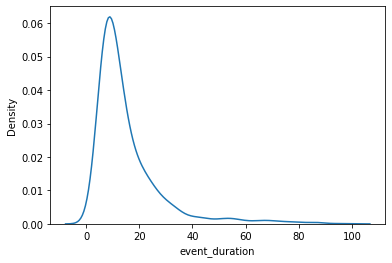

In [28]:
sns.kdeplot(df['event_duration']) # PDF of entire variable

# **3.0 Selecting Column**

In [15]:
#500 random samples are selected for model fit
x=np.array(df['event_duration'].sample(500))

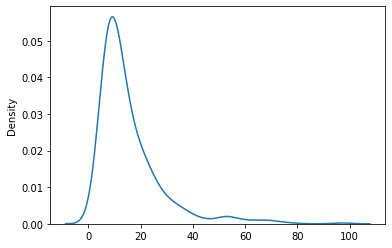

In [29]:
sns.kdeplot(x) # PDF of sample set

**3.1 Finding probability distribution of random variables**

In [17]:
unique, counts = np.unique(x, return_counts=True)
#unique represents the duration of event
#counts represents the number of time an event has occured 

In [18]:
actual=counts/500
# actual gives the True probability of each duration spread

**3.2 Finding the probability of each random variable**

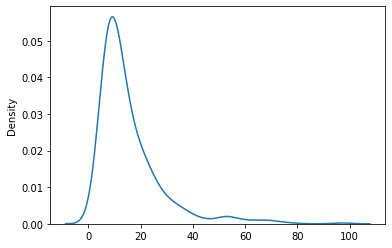

In [19]:
my_data = x
my_kde = sns.kdeplot(my_data)
line = my_kde.lines[0]
x1, y1 = line.get_data()


# **4.0 Fit Statistical Model**

**4.1 Exponential Distribution**

In [20]:
loc, scale=expon.fit(x)
exp=expon.pdf(unique,loc, scale)

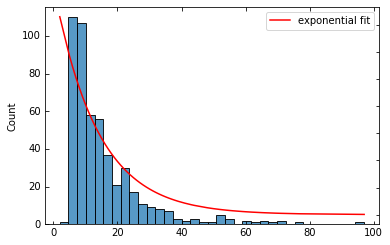

In [21]:
host = host_subplot(111, axes_class=axisartist.Axes)
sns.histplot(x)
par1 = host.twinx()
p1,= par1.plot(unique,exp,label='exponential fit',color='r')
host.legend()
plt.show()

**4.2 Lognormal Distribution**

In [22]:
s1, loc1, scale1=lognorm.fit(x)
log=lognorm.pdf(unique,s1, loc1, scale1)

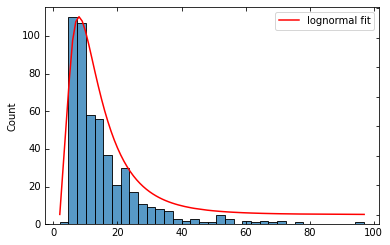

In [23]:
host = host_subplot(111, axes_class=axisartist.Axes)
sns.histplot(x)
par1 = host.twinx()
p1,= par1.plot(unique,log,label='lognormal fit',color='r')
host.legend()
plt.show()

**4.3 Visually Comparing the Distribution Fit**

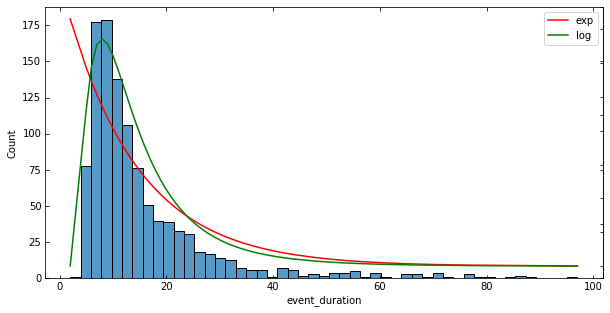

In [24]:
plt.figure(figsize=(10,5))
host = host_subplot(111, axes_class=axisartist.Axes)
par1 = host.twinx()
par2 = host.twinx()
sns.histplot(df['event_duration'])
p1,= par1.plot(unique,exp,label='exp',color='r')
p2,= par1.plot(unique,log,label='log',color='g')
host.legend()
plt.show()

# **5.0 Calculating Mean square Error (MSE) of statistical models**


In [25]:
log_mse = mean_squared_error(actual, log)
exp_mse = mean_squared_error(actual, exp)
print('exponential_mse: {}\nlognormal_mse: {}'.format(exp_mse,log_mse))

exponential_mse: 0.00018680155761722998
lognormal_mse: 3.076520162126142e-05


In [26]:
if min(exp_mse,log_mse) is exp_mse:
  a='Exponential Distribution'
  b=exp_mse
  c=loc
else:
  a='Lognormal Distribution'
  b=log_mse
  c=loc1

In [27]:
print('The most accuarte model is {} with MSE of: {} and\naverage duration of flare is {} minutes'.format(a,b,c))

The most accuarte model is Lognormal Distribution with MSE of: 3.076520162126142e-05 and
average duration of flare is 1.5833444954112386 minutes
